# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!


In [1]:
#Import your libraries
import pandas as pd
import numpy as np

# Challenge 1 -  Explore the Internal Dataset

In this lab, we will start off by working with the wine dataset in scikit-learn. We will select the wine dataset and use a clustering algorithm to learn more about the functionalities of this library. 

We start off by loading the dataset using the `load_wine` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)). In the cell below, we will import the function from scikit-learn.

In [2]:
from sklearn.datasets import load_wine

In the cell below, use the `load_wine` function and assign the wine dataset to a variable called `wine`.

In [3]:
# Your code here:
wine = load_wine()

In the next step, list the keys of the variable `wine` to examine its contents. Note that the `load_wine` function does not return dataframes. It returns you a Python dictionary.

In [4]:
# Your code here:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [5]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [6]:
wine.data.shape

(178, 13)

In [7]:
wine.target.shape

(178,)

Next, list the feature names. These are the different characteristics of the wine. 

In [8]:
# Your code here:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Print the description of the dataset in the cell below using the `DESCR` attribute of the `wine` variable.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the print function.*

In [9]:
# Your code here:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

#### From the description, we see that all columns are numeric. We also know that there is no missing data 

Let's plot the alcohol content histogram. Recall that we are working with a numpy array and will need to use a matplotlib function to produce a histogram. 

In [10]:
# imports
import matplotlib.pyplot as plt

In [97]:
# Using Numpy array to plot histogram
a = wine.data
a[:,0]

array([14.23, 13.2 , 13.16, 14.37, 13.24, 14.2 , 14.39, 14.06, 14.83,
       13.86, 14.1 , 14.12, 13.75, 14.75, 14.38, 13.63, 14.3 , 13.83,
       14.19, 13.64, 14.06, 12.93, 13.71, 12.85, 13.5 , 13.05, 13.39,
       13.3 , 13.87, 14.02, 13.73, 13.58, 13.68, 13.76, 13.51, 13.48,
       13.28, 13.05, 13.07, 14.22, 13.56, 13.41, 13.88, 13.24, 13.05,
       14.21, 14.38, 13.9 , 14.1 , 13.94, 13.05, 13.83, 13.82, 13.77,
       13.74, 13.56, 14.22, 13.29, 13.72, 12.37, 12.33, 12.64, 13.67,
       12.37, 12.17, 12.37, 13.11, 12.37, 13.34, 12.21, 12.29, 13.86,
       13.49, 12.99, 11.96, 11.66, 13.03, 11.84, 12.33, 12.7 , 12.  ,
       12.72, 12.08, 13.05, 11.84, 12.67, 12.16, 11.65, 11.64, 12.08,
       12.08, 12.  , 12.69, 12.29, 11.62, 12.47, 11.81, 12.29, 12.37,
       12.29, 12.08, 12.6 , 12.34, 11.82, 12.51, 12.42, 12.25, 12.72,
       12.22, 11.61, 11.46, 12.52, 11.76, 11.41, 12.08, 11.03, 11.82,
       12.42, 12.77, 12.  , 11.45, 11.56, 12.42, 13.05, 11.87, 12.07,
       12.43, 11.79,

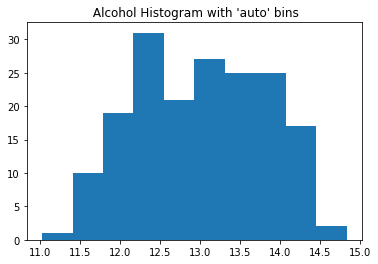

In [99]:
_ = plt.hist(a[:,0])  # arguments are passed to np.histogram
plt.title(" Alcohol Histogram with 'auto' bins")
plt.show()

In [11]:
# Changed the np.array to dataframe
data = wine.data
col_names = wine.feature_names
dataset = pd.DataFrame(data,columns=col_names)
dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


<ipython-input-12-1f2498fa650f>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dataset.hist(ax=ax)


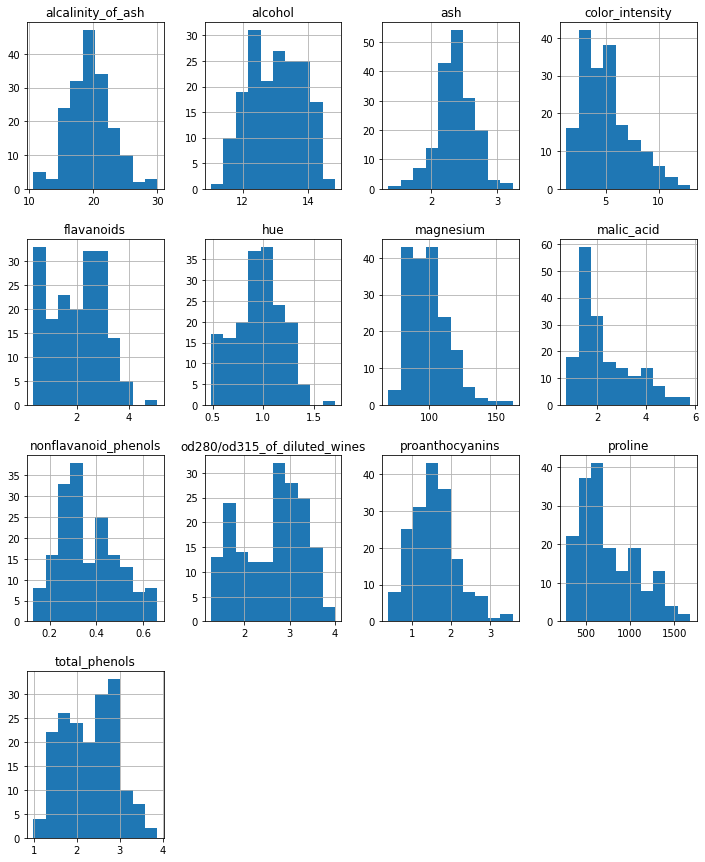

In [12]:
# Your code here:
# Plotting histogram for all columns
fig = plt.figure(figsize = (12,15))
ax = fig.gca()
dataset.hist(ax=ax)
plt.show()

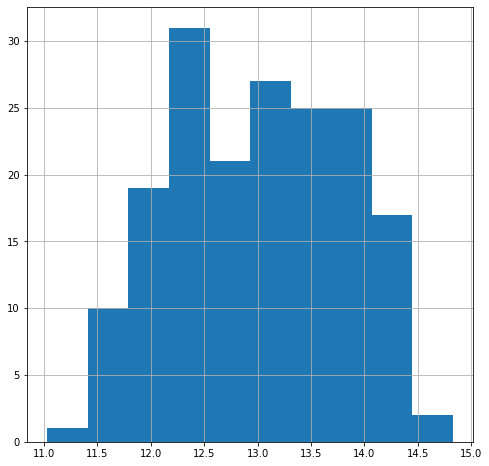

In [13]:
# Plotting histogram for only alcohol feature
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
dataset['alcohol'].hist(ax=ax)
plt.show()

# Challenge 2 - Clustering the Internal Dataset

In this portion of the lab, we will cluster the data to find common traits between the different wines. We will use the k-means clustering algorithm to achieve this goal.

#### We start by importing k-means from scikit-learn and then proceed to create 4 clusters.

In [14]:
# imports
from sklearn.cluster import KMeans

In [15]:
# Your code here:
X = wine.data
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

#### Print the cluster labels.

In [16]:
# Your code here:
lst = list(kmeans.labels_)
lst

[2,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 3,
 1,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 1,
 1,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 1,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 2,
 1,
 3,
 1,
 3,
 1,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 2,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 2,
 2,
 1]

#### Compute the size of each cluster. This can be done by counting the number of occurrences of each unique label in the list above.

Which is the largest cluster of the 4?

In [17]:
# Your code here:
occurences = {}
for element in lst:
    if element in lst:
        occurences[element] = lst.count(element)
occurences

{2: 39, 0: 23, 1: 59, 3: 57}

In [18]:
# Your answer here:
"""cluster 1 has the largest out of the four."""

'cluster 1 has the largest out of the four.'

#### Inspect the shape of `wine['data']`

In [19]:
# Your code here:
wine['data'].shape

(178, 13)

#### Inspect the first 5 records in `wine['data']`

In [20]:
# Your code here:
# I already changed wine['data'] to a dataframe, so I am directly caling that here
dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [21]:
dataset['Clusters'] = lst

In [22]:
# First 5 rows of the dataset
dataset.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Clusters
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


You now know the data object is a 2-dimensional array in which there are 178 rows and 13 columns. Each row is a data record and each column is a feature.

#### What is the average ash content for each cluster? 

*Hints:* 

* *Ash* is the 3rd column.

* The data object is not a Pandas dataframe so you can't apply `pandas.DataFrame.groupby`. Instead, you can use `np.average`.

In [23]:
# Your code here:
average = dataset.groupby(['Clusters']).mean()
average

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
Clusters,,,,,,,,,,,,,
0,13.860000,1.793913,2.506957,17.073913,106.000000,2.943043,3.110870,0.298696,1.926087,6.260000,1.100000,3.035652,1338.565217
1,12.870000,2.697627,2.379322,20.240678,99.830508,2.027627,1.427288,0.404237,1.434915,5.551525,0.870508,2.270169,659.220339
2,13.459487,2.125897,2.390769,18.125641,107.641026,2.594359,2.532821,0.303590,1.808205,5.219231,1.000410,2.976667,985.589744
3,12.475088,2.325263,2.280000,20.636842,91.719298,2.105789,1.871404,0.383333,1.468421,3.952105,0.960526,2.544386,435.578947


# Challenge 3 - Load and Explore an External Dataset

We will now load an external dataset using Pandas and use scikit learn to explore the data. In this portion of the lab, we will use a [patient dataset from Kaggle](https://www.kaggle.com/miles99/patient-admission-dataset-for-learning-data-mining). 

In [24]:
patients = pd.read_csv('/Users/iswetha/ironhack/dataV2-labs/module-3/Unsupervised-Sklearn/data/patient-admission-dataset-for-learning-data-mining.csv')

In the next cell, print the first five rows of the data using the `head()` function.

In [25]:
# Your code here:
patients.head()

,id,patient_name,patient_email,doctor_phone,patient_gender,patient_dob,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,patient_nhs_number,doctor_name,appointment_date,patient_show,is_regular_visit,prescribed_medicines,diagnosis
0,1,Celestyna Dillimore,cdillimore0@dion.ne.jp,674-914-1212,Female,10/18/2018,False,True,59,176,8.200152e+09,Sarena Waliszek,5/1/2018,True,True,triamcinolone acetonide,I669
1,2,Meta Michieli,mmichieli1@loc.gov,172-580-3586,Female,2/8/2018,False,True,77,186,NaN,Farris Robinet,12/7/2017,True,True,NaN,NaN
2,3,Cordie Sancto,csancto2@cafepress.com,794-222-5085,Female,10/9/2018,True,True,90,177,6.145594e+09,Kaspar Spitaro,10/5/2018,False,False,NaN,NaN
3,4,Josh De Ambrosis,jde3@amazon.co.jp,856-540-5195,Male,9/10/2018,True,True,70,150,NaN,Rafferty Fowls,10/21/2018,False,True,NaN,NaN
4,5,Delinda Alfonsini,dalfonsini4@opensource.org,938-978-1131,Female,2/26/2018,False,True,82,140,4.804758e+08,Glenna MacNeachtain,11/15/2018,False,False,NaN,NaN


Next, print the column types and check which columns have been misclassified by pandas.

In [26]:
# Your code here:
patients.dtypes

id                        int64
patient_name             object
patient_email            object
doctor_phone             object
patient_gender           object
patient_dob              object
patient_diabetic           bool
patient_allergic           bool
patient_weight_kg         int64
patient_height_sm         int64
patient_nhs_number      float64
doctor_name              object
appointment_date         object
patient_show               bool
is_regular_visit           bool
prescribed_medicines     object
diagnosis                object
dtype: object

In [27]:
patients.shape

(1000, 17)

#### We can see that none of the date columns have been correctly classified. Also, some columns contain qualitative data that can be dropped.

First, transform the `patient_dob` and `appointment_date` columns to datetime using the `pd.to_datetime` function.

In [28]:
# Your code here:
# Overwriting patient dob and appointment date columns to datetime
patients["patient_dob"]= pd.to_datetime(patients["patient_dob"]) 
patients["appointment_date"]= pd.to_datetime(patients["appointment_date"]) 

In [29]:
patients.dtypes

id                               int64
patient_name                    object
patient_email                   object
doctor_phone                    object
patient_gender                  object
patient_dob             datetime64[ns]
patient_diabetic                  bool
patient_allergic                  bool
patient_weight_kg                int64
patient_height_sm                int64
patient_nhs_number             float64
doctor_name                     object
appointment_date        datetime64[ns]
patient_show                      bool
is_regular_visit                  bool
prescribed_medicines            object
diagnosis                       object
dtype: object

Next, drop the `id`, `patient_name`, `patient_email`, `patient_nhs_number`, and `doctor_phone` columns. These are not quantitative columns and will not contribute to our analysis.

In [30]:
# Your code here:
# dropping qualitative data from tha dataset
colnames = ['id', 'patient_name', 'patient_email', 'patient_nhs_number', 'doctor_phone']
patients.drop(columns = colnames, axis = 1, inplace = True)

In [31]:
patients.head()

,patient_gender,patient_dob,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,doctor_name,appointment_date,patient_show,is_regular_visit,prescribed_medicines,diagnosis
0,Female,2018-10-18,False,True,59,176,Sarena Waliszek,2018-05-01,True,True,triamcinolone acetonide,I669
1,Female,2018-02-08,False,True,77,186,Farris Robinet,2017-12-07,True,True,NaN,NaN
2,Female,2018-10-09,True,True,90,177,Kaspar Spitaro,2018-10-05,False,False,NaN,NaN
3,Male,2018-09-10,True,True,70,150,Rafferty Fowls,2018-10-21,False,True,NaN,NaN
4,Female,2018-02-26,False,True,82,140,Glenna MacNeachtain,2018-11-15,False,False,NaN,NaN


Now we work on the missing data. Most ML algorithms will not perform as intended if there are missing data.

In the cell below, count how many rows contain missing data in each column. You should see three columns contain missing data:

* `doctor_name`: 58 missing data
* `prescribed_medicines`: 488 missing data
* `diagnosis`: 488 missing data

In [32]:
# Your code here:
# checking for NaN values from the columns
patients.isna().sum()

patient_gender            0
patient_dob               0
patient_diabetic          0
patient_allergic          0
patient_weight_kg         0
patient_height_sm         0
doctor_name              58
appointment_date          0
patient_show              0
is_regular_visit          0
prescribed_medicines    488
diagnosis               488
dtype: int64

The main issues are found in the `prescribed_medicines` and `diagnosis` columns. Can we simply drop these rows?

The answer is not yet. Because when there are missing data in these columns, it doesn't mean the data records are broken. Instead, it means no medication was prescribed and no diagnosis was recorded. Therefore, once we fill in the missing data these columns will be fine. But we'll revisit these columns and decide whether we will eventually drop them when we look at how many unique values are there in these categorical columns.  

For the `prescribed_medicines` column, fill the missing values with the value `no prescription`. For the `diagnosis` column, fill the missing values with `no diagnosis`.

*Hint: Use [`pandas.DataFrame.fillna`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html).*

In [33]:
# Your code here:
# Filling NaN values with respective values
values = {'prescribed_medicines': 'no prescription', 'diagnosis': 'no diagnosis'}
patients.fillna(value=values, inplace = True)
patients

,patient_gender,patient_dob,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,doctor_name,appointment_date,patient_show,is_regular_visit,prescribed_medicines,diagnosis
0,Female,2018-10-18,False,True,59,176,Sarena Waliszek,2018-05-01,True,True,triamcinolone acetonide,I669
1,Female,2018-02-08,False,True,77,186,Farris Robinet,2017-12-07,True,True,no prescription,no diagnosis
2,Female,2018-10-09,True,True,90,177,Kaspar Spitaro,2018-10-05,False,False,no prescription,no diagnosis
3,Male,2018-09-10,True,True,70,150,Rafferty Fowls,2018-10-21,False,True,no prescription,no diagnosis
4,Female,2018-02-26,False,True,82,140,Glenna MacNeachtain,2018-11-15,False,False,no prescription,no diagnosis
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Female,2018-11-11,False,True,70,166,NaN,2018-01-12,True,False,no prescription,no diagnosis
996,Female,2018-10-29,False,True,52,154,Flossy Canlin,2017-12-12,True,True,no prescription,no diagnosis
997,Male,2018-01-11,True,True,91,182,Humfried Cartmel,2018-05-17,True,True,no prescription,no diagnosis
998,Male,2018-05-20,False,True,63,157,Farris Robinet,2017-12-15,True,True,IRON SUPPLEMENT,S6610


How about `doctor_name`? Since a doctor visit without a doctor name might not be meaningful, we will drop these rows.

In [34]:
# Your code here:
# Deleting the rows where doctor_name is NaN
del_rows = patients.loc[patients['doctor_name'].isnull()].index
patients = patients.drop(del_rows, axis = 0)
patients 

,patient_gender,patient_dob,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,doctor_name,appointment_date,patient_show,is_regular_visit,prescribed_medicines,diagnosis
0,Female,2018-10-18,False,True,59,176,Sarena Waliszek,2018-05-01,True,True,triamcinolone acetonide,I669
1,Female,2018-02-08,False,True,77,186,Farris Robinet,2017-12-07,True,True,no prescription,no diagnosis
2,Female,2018-10-09,True,True,90,177,Kaspar Spitaro,2018-10-05,False,False,no prescription,no diagnosis
3,Male,2018-09-10,True,True,70,150,Rafferty Fowls,2018-10-21,False,True,no prescription,no diagnosis
4,Female,2018-02-26,False,True,82,140,Glenna MacNeachtain,2018-11-15,False,False,no prescription,no diagnosis
...,...,...,...,...,...,...,...,...,...,...,...,...
994,Female,2018-02-06,True,False,108,157,Cissy Markey,2018-05-10,True,True,no prescription,no diagnosis
996,Female,2018-10-29,False,True,52,154,Flossy Canlin,2017-12-12,True,True,no prescription,no diagnosis
997,Male,2018-01-11,True,True,91,182,Humfried Cartmel,2018-05-17,True,True,no prescription,no diagnosis
998,Male,2018-05-20,False,True,63,157,Farris Robinet,2017-12-15,True,True,IRON SUPPLEMENT,S6610


In [35]:
# Checking still there are any NaN values in the dataset
patients.isna().sum()

patient_gender          0
patient_dob             0
patient_diabetic        0
patient_allergic        0
patient_weight_kg       0
patient_height_sm       0
doctor_name             0
appointment_date        0
patient_show            0
is_regular_visit        0
prescribed_medicines    0
diagnosis               0
dtype: int64

#### Another step in preprocessing that can be performed by scikit-learn is label encoding. 

We have 4 columns that are of `bool` type. We would like to convert them to an integer column containing either zero or one. We can do this using [scikit-learn's label encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In the cell below, import the label encoder and encode the 4 boolean columns (*patient_diabetic*, *patient_allergic*, *patient_show*, *is_regular_visit*) with `0` and `1`. 

In [36]:
# Your code here:
# Transformed the categorical variables to integer variables using Label Encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
patients['patient_diabetic']= le.fit_transform(patients['patient_diabetic']) 
patients['patient_allergic']= le.fit_transform(patients['patient_allergic']) 
patients['patient_show']= le.fit_transform(patients['patient_show']) 
patients['is_regular_visit']= le.fit_transform(patients['is_regular_visit']) 



Print the data dtypes to confirm those four `bool` columns are converted to `int64`.

In [37]:
# Your code here:
# Checking fro the datatypes whether the changes applied or not
patients.dtypes

patient_gender                  object
patient_dob             datetime64[ns]
patient_diabetic                 int64
patient_allergic                 int64
patient_weight_kg                int64
patient_height_sm                int64
doctor_name                     object
appointment_date        datetime64[ns]
patient_show                     int64
is_regular_visit                 int64
prescribed_medicines            object
diagnosis                       object
dtype: object

In [38]:
patients.shape

(942, 12)

#### The last step is to handle the `object` data.

There are 4 `object` columns now: `patient_gender`, `doctor_name`, `prescribed_medicines`, and `diagnosis`. The gender columns

In the next cell, check the unique values of each of the `object` columns using `value_counts()`.

In [39]:
# Your code here:
# Checking for unique values for the object type variables
patients['patient_gender'].value_counts()

Female    476
Male      466
Name: patient_gender, dtype: int64

In [40]:
patients['doctor_name'].value_counts()

Sarena Waliszek           74
Cissy Markey              57
Flossy Canlin             55
Farris Robinet            55
Gabie Brafield            53
Glenna MacNeachtain       53
Jilly McGrill             53
Nerte Elmer               51
Oralie Swaffer            49
Kaspar Spitaro            48
Wyn Grassett              47
Humfried Cartmel          47
Carly SperaJillie Katt    47
Madelina Scurrell         46
Rafferty Fowls            45
Dulce McKerley            42
Rouvin McKinstry          42
Ryley Swallow             40
Hermina Domeny            38
Name: doctor_name, dtype: int64

In [41]:
patients['prescribed_medicines'].value_counts()

no prescription                                                                                 457
ALCOHOL                                                                                           8
Ibuprofen                                                                                         6
Acetaminophen                                                                                     5
Triclosan                                                                                         5
                                                                                               ... 
Diltiazem Hydrochloride                                                                           1
OCTINOXATE, TITANIUM DIOXIDE, DIMETHICONE, ALUMINUM HYDROXIDE, STEARIC ACID, HYDROXYPROLINE,      1
Warfarin Sodium                                                                                   1
Pyrithione zinc                                                                                   1


In [42]:
patients['diagnosis'].value_counts()

no diagnosis    457
T2169             2
Y248              1
M11849            1
A1859             1
               ... 
S66319A           1
S420              1
M7101             1
S82134D           1
I669              1
Name: diagnosis, Length: 485, dtype: int64

#### The number of unique values is large for all three columns except `patient_gender`. We will handle these columns differently.

For `diagnosis`, there are too many unique values which will make ML difficult. However, we can re-encode the values to either with or without diagnosis. Remember at an earlier step we filled in the missing values of this column with *no diagnosis*? We can re-encode *no diagnosis* to `0` and all other values to `1`. In this way we can tremendously simply this column.

For `prescribed_medicines`, we can drop this column because it is perfectly correlated with `diagnosis`. Whenever there is no diagnosis, there is no prescribed medicine. So we don't need to keep this duplicated data.

How about `doctor_name`? There are not excessive unique values but still quite many (19). We may either drop or keep it but keeping it will make the analysis more complicated. So due to the length of this lab let's drop it.

How about `gender`? This one is easy. Just like re-encoding the boolean values, we can re-encode gender to `0` and `1` because there are only 2 unique values.

In the next cells, do the following:

1. Create a new column called `diagnosis_int` that has `0` and `1` based on the values in `diagnosis`.

1. Create a new column called `patient_gender_int` that has `0` and `1` based on the values in `patient_gender`.

1. Drop the following columns: `doctor_name`, `diagnosis`, `prescribed_medicines`, and `patient_gender`.

In [43]:
# Your code here:
# Replace no diagnosis to no diagnosis and all other values to diagnosis
patients.loc[~patients["diagnosis"].str.contains("no diagnosis", case=False), 'diagnosis'] = "diagnosis"


# Label encoding for diagnosis column because there are huge unique values in it.
patients['diagnosis_int']= le.fit_transform(patients['diagnosis']) 


In [44]:
# Label encoding for Gender column because there are two values either male or female.
patients['patient_gender_int']= le.fit_transform(patients['patient_gender']) 

In [45]:
# Dropping the columns 
colnames = ['doctor_name', 'diagnosis', 'prescribed_medicines', 'patient_gender']
patients.drop(columns = colnames, axis = 1, inplace = True)

Let's look at the head again to ensure the re-encoding and dropping are successful:

In [46]:
# Your code here:
patients

,patient_dob,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,appointment_date,patient_show,is_regular_visit,diagnosis_int,patient_gender_int
0,2018-10-18,0,1,59,176,2018-05-01,1,1,0,0
1,2018-02-08,0,1,77,186,2017-12-07,1,1,1,0
2,2018-10-09,1,1,90,177,2018-10-05,0,0,1,0
3,2018-09-10,1,1,70,150,2018-10-21,0,1,1,1
4,2018-02-26,0,1,82,140,2018-11-15,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
994,2018-02-06,1,0,108,157,2018-05-10,1,1,1,0
996,2018-10-29,0,1,52,154,2017-12-12,1,1,1,0
997,2018-01-11,1,1,91,182,2018-05-17,1,1,1,1
998,2018-05-20,0,1,63,157,2017-12-15,1,1,0,1


In [47]:
patients.diagnosis_int.value_counts()

0    485
1    457
Name: diagnosis_int, dtype: int64

An interesting observation is that all patients are no older than 2 years. However, their weights and heights indicate that they are adults. This cannot be true. Therefore, we can either trust the weight and height columns or the DOB column. Since there are other columns that indicate that these are adults (they have emails, some have diabetes) we will drop the `patient_dob` column. We will also drop the `appointment_date` column since it has too many unique values to transform to a dummy variable. Drop the two columns in the cell below.

In [55]:
# Your code here:
colnames = ['patient_dob', 'appointment_date']
patients.drop(columns = colnames, axis = 1, inplace = True)
patients

,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,patient_show,is_regular_visit,diagnosis_int,patient_gender_int
0,0,1,59,176,1,1,0,0
1,0,1,77,186,1,1,1,0
2,1,1,90,177,0,0,1,0
3,1,1,70,150,0,1,1,1
4,0,1,82,140,0,0,1,0
...,...,...,...,...,...,...,...,...
994,1,0,108,157,1,1,1,0
996,0,1,52,154,1,1,1,0
997,1,1,91,182,1,1,1,1
998,0,1,63,157,1,1,0,1


#### Our data is now ready for clustering. Let's use k-means again.

We start by initializing and fitting a model in the cell below. Call this model patients_cluster.

In [57]:
# Your code here:
X = patients
patients_cluster = KMeans(n_clusters=4, random_state=0).fit(X)

Attach the labels to the dataframe. Do this by accessing the `labels_` in the `patients_cluster` model and assign them to a new column in `patients` that you will call `labels`.

In [59]:
# Your code here:
patients['labels'] = patients_cluster.labels_

In [60]:
patients

,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,patient_show,is_regular_visit,diagnosis_int,patient_gender_int,labels
0,0,1,59,176,1,1,0,0,2
1,0,1,77,186,1,1,1,0,2
2,1,1,90,177,0,0,1,0,0
3,1,1,70,150,0,1,1,1,1
4,0,1,82,140,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...
994,1,0,108,157,1,1,1,0,3
996,0,1,52,154,1,1,1,0,1
997,1,1,91,182,1,1,1,1,0
998,0,1,63,157,1,1,0,1,1


Now using a `groupby`, find the mean of every variable in `patients` and group by the `labels` column. This summary will allow us to see how the patients differ between the clusters. Your output should look similar to the image below.

![groupby mean](../images/groupby-mean.png)

Additionally, add a comment to describe which columns have the largest difference between clusters.

In [63]:
# Your code here:
patients.groupby(['labels']).mean()

,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,patient_show,is_regular_visit,diagnosis_int,patient_gender_int
labels,,,,,,,,
0,0.492063,0.488095,94.063492,178.686508,0.503968,0.531746,0.488095,0.456349
1,0.506494,0.493506,65.432900,152.354978,0.510823,0.558442,0.493506,0.554113
2,0.508333,0.533333,62.900000,176.954167,0.475000,0.495833,0.545833,0.454167
3,0.552511,0.525114,97.557078,153.319635,0.488584,0.502283,0.406393,0.520548


In [52]:
# Your comment here:
"""Columns patient_weight_kg and patient_height_sm have a largest difference between the clusters"""

# Bonus Challenge: Visualize K-Means Clusters

How did k-means cluster the data? You can obtain an intuitive view with a scatter plot. Generate a 2-d cluster plot below using `matplotlib`. You need to choose 2 of the features from your cleaned and transformed dataset, and use color to represent the cluster label generated from k-means.

If the scatter plot does not make any sense to you, it means the features you chose to visualize are not the right ones. You should be able to see 4 clear clusters with different colors in your visualization that suggests how k-means had clustered your data.

![Cluster Visualization](../images/clusters.png)

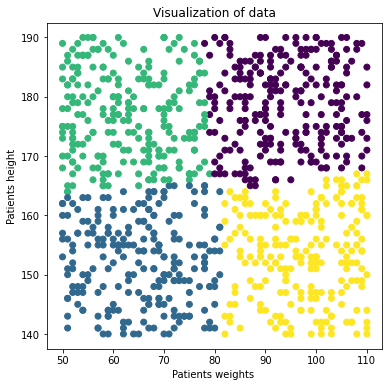

In [74]:
# Your code here:
# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(patients['patient_weight_kg'], patients['patient_height_sm'], c = patients['labels'])
plt.xlabel('Patients weights ')
plt.ylabel('Patients height')
plt.title('Visualization of data');

Additionally, you can visualize the clusters in 3-D scatter plot. Give it a try below.

Text(0.5, 0.92, 'Visualization of data')

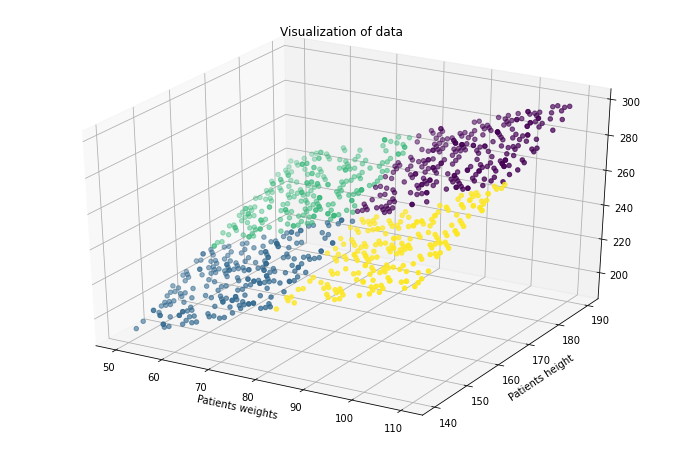

In [80]:
# Your code here:
fig = plt.figure(figsize = (12,8))
ax = plt.axes(projection='3d')


x = patients['patient_weight_kg']
y = patients['patient_height_sm']

z = x + y

ax.scatter(x, y, z, c=patients['labels'])
plt.xlabel('Patients weights ')
plt.ylabel('Patients height')
plt.title('Visualization of data')